## Importing All the Libraries

In [216]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [217]:
df = pd.read_csv('roo_data.csv')
df

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,...,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,...,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,...,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,...,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


In [218]:
df['Suggested Job Role'].unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

## PreProcessing and Grouping Data

In [219]:
def classify_job(job_profile, keyword):
    job_profiles_classified = []
    for jobs in df['Suggested Job Role'].unique():
        if jobs.find(keyword) !=-1:
            job_profiles_classified.append(jobs)
    if(len(job_profiles_classified)>0):
        df['Suggested Job Role'] = df['Suggested Job Role'].replace(job_profiles_classified, job_profile)
classify_job('Analyst','Analyst')
classify_job('Developer', 'Developer')
classify_job('Manager', 'Manager')
classify_job('Architect', 'Architect')
classify_job('Engineer', 'Engineer')
classify_job('Administrator', 'Administrator')
classify_job('Customer Care', 'Support')
classify_job('UX', 'Design')
df['Suggested Job Role'] = df['Suggested Job Role'].replace(['Quality Assurance Associate', 'Software Quality Assurance (QA) / Testing',
                                                                'Information Technology Auditor'], 'Quality Check')
df['Suggested Job Role'].unique()

array(['Developer', 'Administrator', 'Analyst', 'Engineer', 'UX',
       'Quality Check', 'Customer Care', 'Manager', 'Architect'],
      dtype=object)

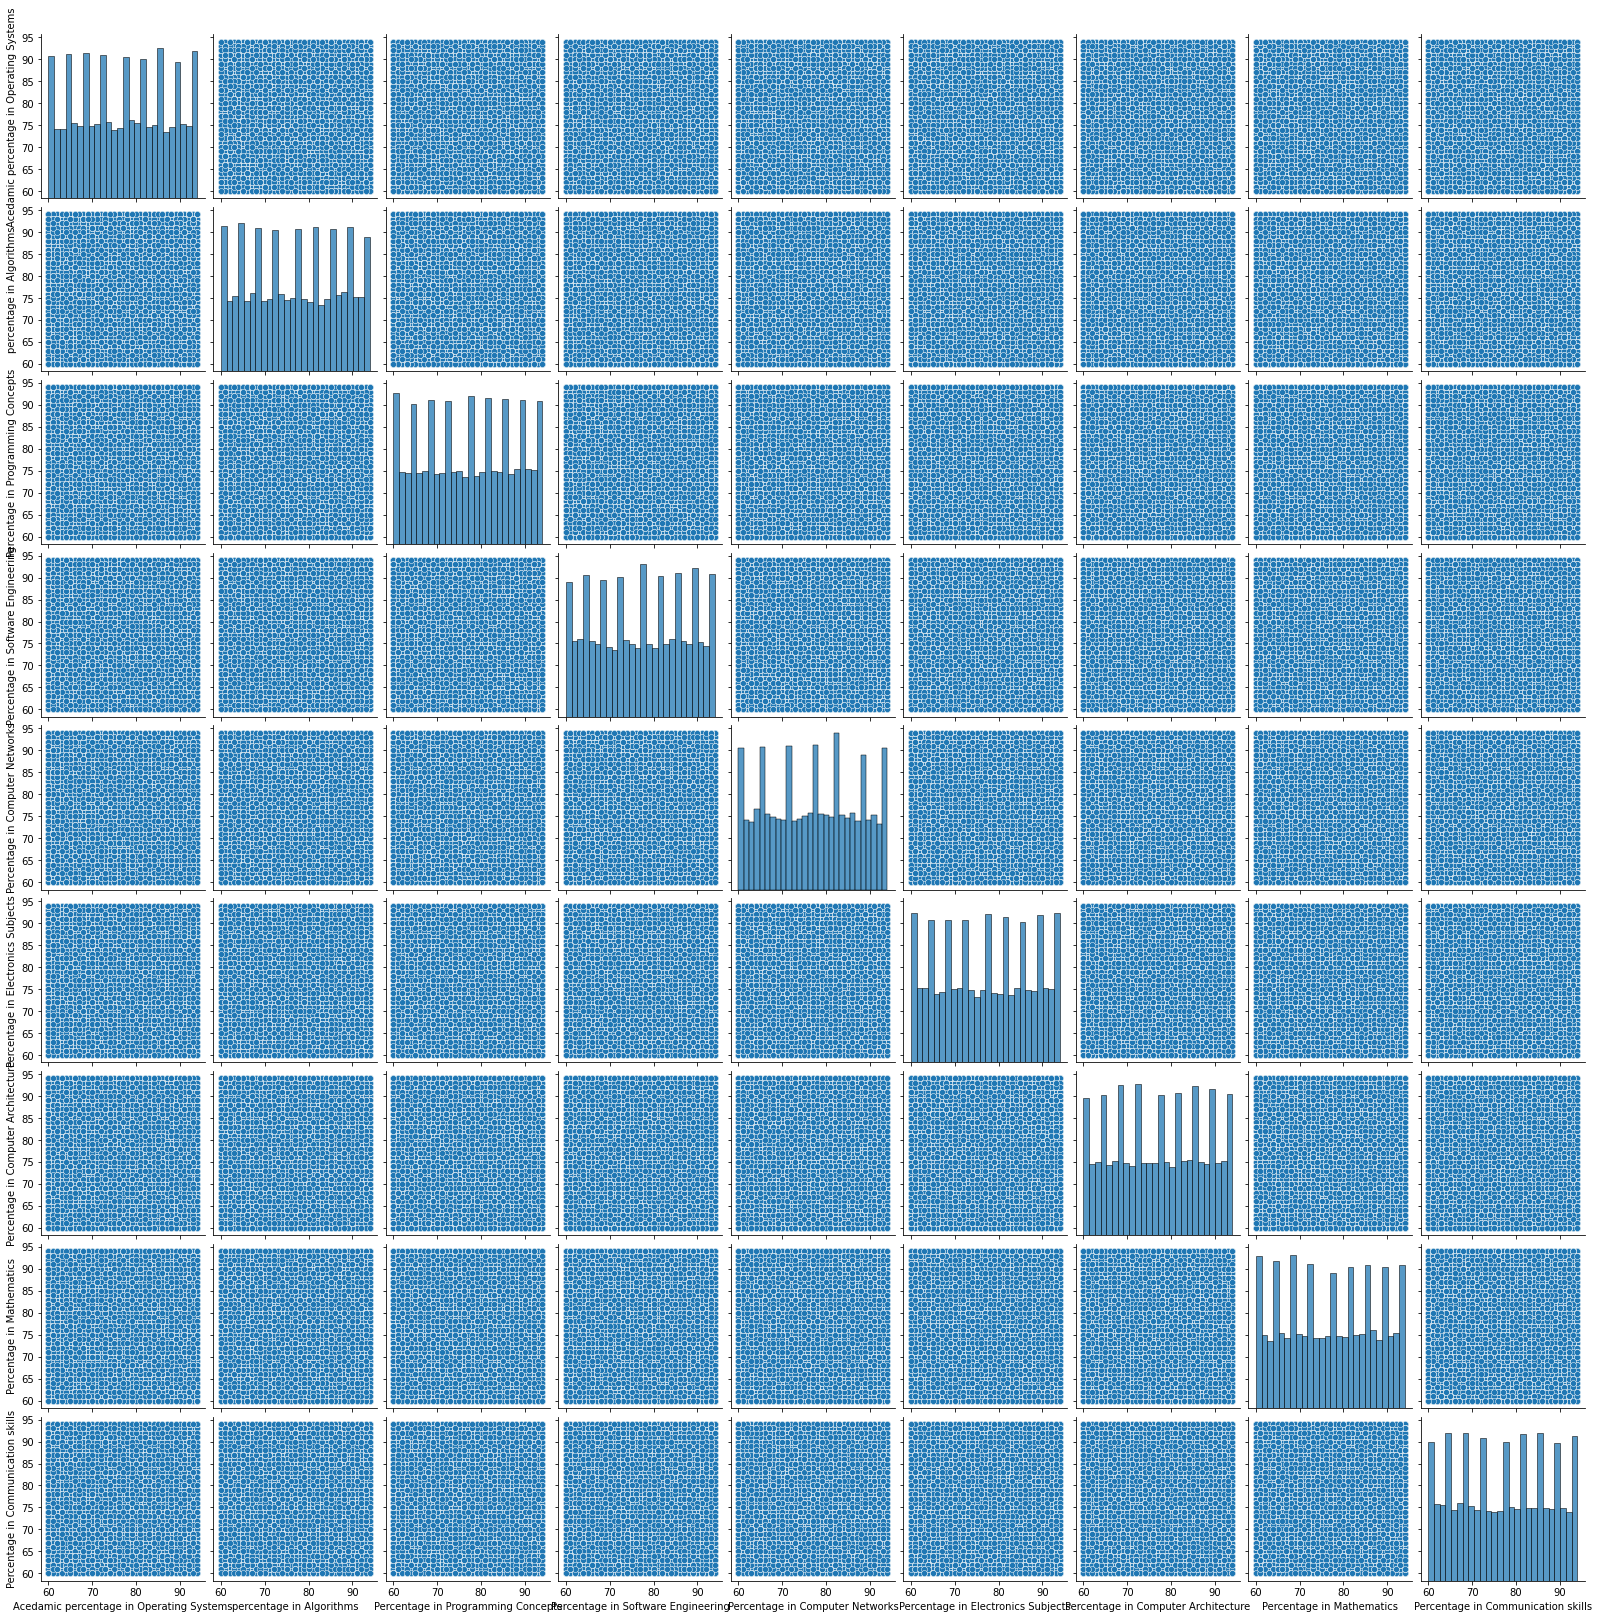

In [220]:
elective_data = df[['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Suggested Job Role']]
sns.pairplot(elective_data)

## Label Encoding

Helps in transforming the values of cells to numerical values by proper enccoding so that it can be easily understood and calculated by the model

In [221]:
from sklearn import preprocessing

def label_encoding():
    label_encoder = preprocessing.LabelEncoder()
    for colname in df.columns:
        if df[colname].dtype != 'int64' and df[colname].dtype != 'float64':
            df[colname] = label_encoder.fit_transform(df[colname])
label_encoding()

In [222]:
X = df.drop(columns=['Suggested Job Role'])
Y = df['Suggested Job Role']

In [223]:
def classwise_Accuracy(Confusion_Matr):
    for confusion_matrix in Confusion_Matr:
        diagonal_sum = confusion_matrix.trace()
        sum_of_all_elements = confusion_matrix.sum()
        print("Confusion Matrix", confusion_matrix)
        print("Its accuracy",diagonal_sum / sum_of_all_elements)
        print("\n")

In [224]:
score_trend=[]
testratio_trend=[]
def ANN_Model(testsize):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=testsize, random_state=2002)
    sc_X = StandardScaler()
    X_train_sc= sc_X.fit_transform(X_train)
    X_test_sc= sc_X.transform(X_test)
    
    model = MLPClassifier(activation='relu', early_stopping= True, hidden_layer_sizes=(128,64,32), max_iter = 1000).fit(X_train_sc,Y_train)
    y_pred=model.predict(X_test)
    #y_pred=model.predict(entry_df)
    score=model.score(X_train_sc, Y_train)
    print("Accuracy score:",score)
    score_trend.append(score*100)
    testratio_trend.append(testsize*100)
    classwise_Accuracy(multilabel_confusion_matrix(Y_test, y_pred, labels= np.unique(Y)))


### Train:Test -> 90:10

In [225]:
ANN_Model(0.1)

Accuracy score: 0.1932222222222222
Confusion Matrix [[1722    0]
 [ 278    0]]
Its accuracy 0.861


Confusion Matrix [[1576   29]
 [ 386    9]]
Its accuracy 0.7925


Confusion Matrix [[1886    0]
 [ 114    0]]
Its accuracy 0.943


Confusion Matrix [[1890    0]
 [ 110    0]]
Its accuracy 0.945


Confusion Matrix [[1652    0]
 [ 348    0]]
Its accuracy 0.826


Confusion Matrix [[  36 1674]
 [   2  288]]
Its accuracy 0.162


Confusion Matrix [[1831    0]
 [ 169    0]]
Its accuracy 0.9155


Confusion Matrix [[1823    0]
 [ 177    0]]
Its accuracy 0.9115


Confusion Matrix [[1881    0]
 [ 119    0]]
Its accuracy 0.9405




### Train:Test -> 80:20

In [226]:
ANN_Model(0.2)

Accuracy score: 0.20475
Confusion Matrix [[3445    0]
 [ 555    0]]
Its accuracy 0.86125


Confusion Matrix [[   0 3232]
 [   0  768]]
Its accuracy 0.192


Confusion Matrix [[3770    0]
 [ 230    0]]
Its accuracy 0.9425


Confusion Matrix [[3766    0]
 [ 234    0]]
Its accuracy 0.9415


Confusion Matrix [[3282    0]
 [ 718    0]]
Its accuracy 0.8205


Confusion Matrix [[3406    0]
 [ 594    0]]
Its accuracy 0.8515


Confusion Matrix [[3666    0]
 [ 334    0]]
Its accuracy 0.9165


Confusion Matrix [[3668    0]
 [ 332    0]]
Its accuracy 0.917


Confusion Matrix [[3765    0]
 [ 235    0]]
Its accuracy 0.94125




### Train:Test -> 70:30

In [227]:
ANN_Model(0.3)

Accuracy score: 0.195
Confusion Matrix [[  18 5126]
 [   6  850]]
Its accuracy 0.14466666666666667


Confusion Matrix [[4826   22]
 [1150    2]]
Its accuracy 0.8046666666666666


Confusion Matrix [[5650    0]
 [ 350    0]]
Its accuracy 0.9416666666666667


Confusion Matrix [[5658    0]
 [ 342    0]]
Its accuracy 0.943


Confusion Matrix [[4948    0]
 [1052    0]]
Its accuracy 0.8246666666666667


Confusion Matrix [[5102    0]
 [ 898    0]]
Its accuracy 0.8503333333333334


Confusion Matrix [[5487    0]
 [ 513    0]]
Its accuracy 0.9145


Confusion Matrix [[5505    0]
 [ 495    0]]
Its accuracy 0.9175


Confusion Matrix [[5658    0]
 [ 342    0]]
Its accuracy 0.943




### Train:Test -> 60:40

In [228]:
ANN_Model(0.4)

Accuracy score: 0.29675
Confusion Matrix [[6842   30]
 [1124    4]]
Its accuracy 0.85575


Confusion Matrix [[5779  668]
 [1405  148]]
Its accuracy 0.740875


Confusion Matrix [[7529    0]
 [ 471    0]]
Its accuracy 0.941125


Confusion Matrix [[7540    0]
 [ 460    0]]
Its accuracy 0.9425


Confusion Matrix [[1788 4828]
 [ 382 1002]]
Its accuracy 0.34875


Confusion Matrix [[5684 1133]
 [ 996  187]]
Its accuracy 0.733875


Confusion Matrix [[7324    0]
 [ 676    0]]
Its accuracy 0.9155


Confusion Matrix [[7320    0]
 [ 680    0]]
Its accuracy 0.915


Confusion Matrix [[7535    0]
 [ 465    0]]
Its accuracy 0.941875




In [229]:
ANN_Model(0.15)

Accuracy score: 0.23358823529411765
Confusion Matrix [[2599    0]
 [ 401    0]]
Its accuracy 0.8663333333333333


Confusion Matrix [[2404   28]
 [ 561    7]]
Its accuracy 0.8036666666666666


Confusion Matrix [[2825    0]
 [ 175    0]]
Its accuracy 0.9416666666666667


Confusion Matrix [[2825    0]
 [ 175    0]]
Its accuracy 0.9416666666666667


Confusion Matrix [[  28 2443]
 [   7  522]]
Its accuracy 0.18333333333333332


Confusion Matrix [[2545    0]
 [ 455    0]]
Its accuracy 0.8483333333333334


Confusion Matrix [[2741    0]
 [ 259    0]]
Its accuracy 0.9136666666666666


Confusion Matrix [[2741    0]
 [ 259    0]]
Its accuracy 0.9136666666666666


Confusion Matrix [[2821    0]
 [ 179    0]]
Its accuracy 0.9403333333333334




In [230]:
ANN_Model(0.25)

Accuracy score: 0.2302
Confusion Matrix [[4281    0]
 [ 719    0]]
Its accuracy 0.8562


Confusion Matrix [[   0 4044]
 [   0  956]]
Its accuracy 0.1912


Confusion Matrix [[4712    0]
 [ 288    0]]
Its accuracy 0.9424


Confusion Matrix [[4708    0]
 [ 292    0]]
Its accuracy 0.9416


Confusion Matrix [[4124    0]
 [ 876    0]]
Its accuracy 0.8248


Confusion Matrix [[4259    0]
 [ 741    0]]
Its accuracy 0.8518


Confusion Matrix [[4575    0]
 [ 425    0]]
Its accuracy 0.915


Confusion Matrix [[4593    0]
 [ 407    0]]
Its accuracy 0.9186


Confusion Matrix [[4704    0]
 [ 296    0]]
Its accuracy 0.9408




[10.0, 20.0, 30.0, 40.0, 15.0, 25.0]


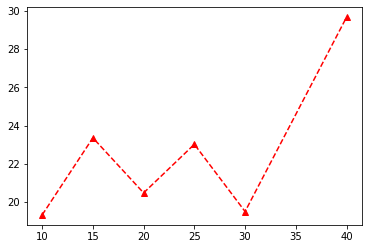

In [231]:
import matplotlib.pyplot as plt

score_trend=[y for x, y in sorted(zip(testratio_trend, score_trend))]
plt.plot(sorted(testratio_trend),score_trend,'r^--')
print(testratio_trend)

## Modifying for connecting the data to Assignment 1, point g of Assignment

In [233]:
df = pd.read_csv('roo_data.csv')
df.rename( columns = {'Acedamic percentage in Operating Systems': 'Operating Systems', 'percentage in Algorithms': 'Algorithms',
       'Percentage in Programming Concepts': 'Introduction to Programming',
       'Percentage in Software Engineering': 'Machine Learning', 'Percentage in Computer Networks': 'Computer Networks',
       'Percentage in Electronics Subjects': 'Artitificial Intelligence',
       'Percentage in Computer Architecture': 'Parallel Programming', 'Percentage in Mathematics': 'Network Administration',
       'Percentage in Communication skills': 'MicroEconomics'}, inplace = True)

In [234]:
def classify_job(job_profile, keyword):
    job_profiles_classified = []
    for jobs in df['Suggested Job Role'].unique():
        if jobs.find(keyword) !=-1:
            job_profiles_classified.append(jobs)
    if(len(job_profiles_classified)>0):
        df['Suggested Job Role'] = df['Suggested Job Role'].replace(job_profiles_classified, job_profile)
classify_job('Data Scientist','Analyst')
classify_job('Automation Engineer', 'Developer')
classify_job('Manager', 'Manager')
classify_job('Network Architect', 'Architect')
classify_job('High Computing', 'Engineer')
classify_job('Administrator', 'Administrator')
classify_job('Marketing', 'Support')
classify_job('UX', 'Design')
df['Suggested Job Role'] = df['Suggested Job Role'].replace(['Quality Assurance Associate', 'Software Quality Assurance (QA) / Testing',
                                                                'Information Technology Auditor'], 'Quality Check')
df['Suggested Job Role'].unique()

array(['High Computing', 'Administrator', 'Data Scientist', 'UX',
       'Quality Check', 'Marketing', 'Manager', 'Network Architect'],
      dtype=object)

## Code below this is just experimental and to be avoided. Was trying to take user input & predict the role

In [ ]:
entry_df = df[0:0]
entry_df= entry_df.drop(columns=['Suggested Job Role'])
entry_vals={}
print("Enter inputs as follows")
for entries in entry_df.columns:
    print(entries)
    user_data= input("Enter value between {0} & {1}".format(df[entries].min(),df[entries].max()))
    entry_vals[entries] = user_data
entry_df= entry_df.append(entry_vals, ignore_index=True)
entry_df

In [ ]:
ANN_Model(0.2)
print(y_pred)